In \[1\]:

    import pandas as pd
    import numpy as np
    import seaborn as sns
    import plotly.express as px
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import warnings 
    warnings.filterwarnings('ignore')

In \[2\]:

    data=pd.read_csv(r'C:\Users\admin\Downloads\data (2).csv')

In \[3\]:

    data.head()

Out\[3\]:

|     | date                | price     | bedrooms | bathrooms | sqft\_living | sqft\_lot | floors | waterfront | view | condition | sqft\_above | sqft\_basement | yr\_built | yr\_renovated | street                   | city      | statezip | country |
|-----|---------------------|-----------|----------|-----------|--------------|-----------|--------|------------|------|-----------|-------------|----------------|-----------|---------------|--------------------------|-----------|----------|---------|
| 0   | 2014-05-02 00:00:00 | 313000.0  | 3.0      | 1.50      | 1340         | 7912      | 1.5    | 0          | 0    | 3         | 1340        | 0              | 1955      | 2005          | 18810 Densmore Ave N     | Shoreline | WA 98133 | USA     |
| 1   | 2014-05-02 00:00:00 | 2384000.0 | 5.0      | 2.50      | 3650         | 9050      | 2.0    | 0          | 4    | 5         | 3370        | 280            | 1921      | 0             | 709 W Blaine St          | Seattle   | WA 98119 | USA     |
| 2   | 2014-05-02 00:00:00 | 342000.0  | 3.0      | 2.00      | 1930         | 11947     | 1.0    | 0          | 0    | 4         | 1930        | 0              | 1966      | 0             | 26206-26214 143rd Ave SE | Kent      | WA 98042 | USA     |
| 3   | 2014-05-02 00:00:00 | 420000.0  | 3.0      | 2.25      | 2000         | 8030      | 1.0    | 0          | 0    | 4         | 1000        | 1000           | 1963      | 0             | 857 170th Pl NE          | Bellevue  | WA 98008 | USA     |
| 4   | 2014-05-02 00:00:00 | 550000.0  | 4.0      | 2.50      | 1940         | 10500     | 1.0    | 0          | 0    | 4         | 1140        | 800            | 1976      | 1992          | 9105 170th Ave NE        | Redmond   | WA 98052 | USA     |

In \[4\]:

    #information about the data
    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 4600 entries, 0 to 4599
    Data columns (total 18 columns):
     #   Column         Non-Null Count  Dtype  
    ---  ------         --------------  -----  
     0   date           4600 non-null   object 
     1   price          4600 non-null   float64
     2   bedrooms       4600 non-null   float64
     3   bathrooms      4600 non-null   float64
     4   sqft_living    4600 non-null   int64  
     5   sqft_lot       4600 non-null   int64  
     6   floors         4600 non-null   float64
     7   waterfront     4600 non-null   int64  
     8   view           4600 non-null   int64  
     9   condition      4600 non-null   int64  
     10  sqft_above     4600 non-null   int64  
     11  sqft_basement  4600 non-null   int64  
     12  yr_built       4600 non-null   int64  
     13  yr_renovated   4600 non-null   int64  
     14  street         4600 non-null   object 
     15  city           4600 non-null   object 
     16  statezip       4600 non-null   object 
     17  country        4600 non-null   object 
    dtypes: float64(4), int64(9), object(5)
    memory usage: 647.0+ KB

In \[5\]:

    #checking the null values
    data.isnull().sum()

Out\[5\]:

    date             0
    price            0
    bedrooms         0
    bathrooms        0
    sqft_living      0
    sqft_lot         0
    floors           0
    waterfront       0
    view             0
    condition        0
    sqft_above       0
    sqft_basement    0
    yr_built         0
    yr_renovated     0
    street           0
    city             0
    statezip         0
    country          0
    dtype: int64

In \[6\]:

    data.describe(include=np.number)

Out\[6\]:

|       | price        | bedrooms    | bathrooms   | sqft\_living | sqft\_lot    | floors      | waterfront  | view        | condition   | sqft\_above | sqft\_basement | yr\_built   | yr\_renovated |
|-------|--------------|-------------|-------------|--------------|--------------|-------------|-------------|-------------|-------------|-------------|----------------|-------------|---------------|
| count | 4.600000e+03 | 4600.000000 | 4600.000000 | 4600.000000  | 4.600000e+03 | 4600.000000 | 4600.000000 | 4600.000000 | 4600.000000 | 4600.000000 | 4600.000000    | 4600.000000 | 4600.000000   |
| mean  | 5.519630e+05 | 3.400870    | 2.160815    | 2139.346957  | 1.485252e+04 | 1.512065    | 0.007174    | 0.240652    | 3.451739    | 1827.265435 | 312.081522     | 1970.786304 | 808.608261    |
| std   | 5.638347e+05 | 0.908848    | 0.783781    | 963.206916   | 3.588444e+04 | 0.538288    | 0.084404    | 0.778405    | 0.677230    | 862.168977  | 464.137228     | 29.731848   | 979.414536    |
| min   | 0.000000e+00 | 0.000000    | 0.000000    | 370.000000   | 6.380000e+02 | 1.000000    | 0.000000    | 0.000000    | 1.000000    | 370.000000  | 0.000000       | 1900.000000 | 0.000000      |
| 25%   | 3.228750e+05 | 3.000000    | 1.750000    | 1460.000000  | 5.000750e+03 | 1.000000    | 0.000000    | 0.000000    | 3.000000    | 1190.000000 | 0.000000       | 1951.000000 | 0.000000      |
| 50%   | 4.609435e+05 | 3.000000    | 2.250000    | 1980.000000  | 7.683000e+03 | 1.500000    | 0.000000    | 0.000000    | 3.000000    | 1590.000000 | 0.000000       | 1976.000000 | 0.000000      |
| 75%   | 6.549625e+05 | 4.000000    | 2.500000    | 2620.000000  | 1.100125e+04 | 2.000000    | 0.000000    | 0.000000    | 4.000000    | 2300.000000 | 610.000000     | 1997.000000 | 1999.000000   |
| max   | 2.659000e+07 | 9.000000    | 8.000000    | 13540.000000 | 1.074218e+06 | 3.500000    | 1.000000    | 4.000000    | 5.000000    | 9410.000000 | 4820.000000    | 2014.000000 | 2014.000000   |

In \[7\]:

    data.describe(include=object)

Out\[7\]:

|        | date                | street                | city    | statezip | country |
|--------|---------------------|-----------------------|---------|----------|---------|
| count  | 4600                | 4600                  | 4600    | 4600     | 4600    |
| unique | 70                  | 4525                  | 44      | 77       | 1       |
| top    | 2014-06-23 00:00:00 | 2520 Mulberry Walk NE | Seattle | WA 98103 | USA     |
| freq   | 142                 | 4                     | 1573    | 148      | 4600    |

In \[8\]:

    #droping data colums
    data.drop(columns='date',inplace=True)

In \[9\]:

    #checking the categorical and numerical columnd
    num_var=data.select_dtypes(include=np.number).columns.to_list()
    cat_var=data.select_dtypes(include=object).columns.to_list()

In \[10\]:

    cat_var

Out\[10\]:

    ['street', 'city', 'statezip', 'country']

In \[11\]:

    data1=data.copy() # to retain original data

In \[12\]:

    data1

Out\[12\]:

|      | price        | bedrooms | bathrooms | sqft\_living | sqft\_lot | floors | waterfront | view | condition | sqft\_above | sqft\_basement | yr\_built | yr\_renovated | street                   | city      | statezip | country |
|------|--------------|----------|-----------|--------------|-----------|--------|------------|------|-----------|-------------|----------------|-----------|---------------|--------------------------|-----------|----------|---------|
| 0    | 3.130000e+05 | 3.0      | 1.50      | 1340         | 7912      | 1.5    | 0          | 0    | 3         | 1340        | 0              | 1955      | 2005          | 18810 Densmore Ave N     | Shoreline | WA 98133 | USA     |
| 1    | 2.384000e+06 | 5.0      | 2.50      | 3650         | 9050      | 2.0    | 0          | 4    | 5         | 3370        | 280            | 1921      | 0             | 709 W Blaine St          | Seattle   | WA 98119 | USA     |
| 2    | 3.420000e+05 | 3.0      | 2.00      | 1930         | 11947     | 1.0    | 0          | 0    | 4         | 1930        | 0              | 1966      | 0             | 26206-26214 143rd Ave SE | Kent      | WA 98042 | USA     |
| 3    | 4.200000e+05 | 3.0      | 2.25      | 2000         | 8030      | 1.0    | 0          | 0    | 4         | 1000        | 1000           | 1963      | 0             | 857 170th Pl NE          | Bellevue  | WA 98008 | USA     |
| 4    | 5.500000e+05 | 4.0      | 2.50      | 1940         | 10500     | 1.0    | 0          | 0    | 4         | 1140        | 800            | 1976      | 1992          | 9105 170th Ave NE        | Redmond   | WA 98052 | USA     |
| ...  | ...          | ...      | ...       | ...          | ...       | ...    | ...        | ...  | ...       | ...         | ...            | ...       | ...           | ...                      | ...       | ...      | ...     |
| 4595 | 3.081667e+05 | 3.0      | 1.75      | 1510         | 6360      | 1.0    | 0          | 0    | 4         | 1510        | 0              | 1954      | 1979          | 501 N 143rd St           | Seattle   | WA 98133 | USA     |
| 4596 | 5.343333e+05 | 3.0      | 2.50      | 1460         | 7573      | 2.0    | 0          | 0    | 3         | 1460        | 0              | 1983      | 2009          | 14855 SE 10th Pl         | Bellevue  | WA 98007 | USA     |
| 4597 | 4.169042e+05 | 3.0      | 2.50      | 3010         | 7014      | 2.0    | 0          | 0    | 3         | 3010        | 0              | 2009      | 0             | 759 Ilwaco Pl NE         | Renton    | WA 98059 | USA     |
| 4598 | 2.034000e+05 | 4.0      | 2.00      | 2090         | 6630      | 1.0    | 0          | 0    | 3         | 1070        | 1020           | 1974      | 0             | 5148 S Creston St        | Seattle   | WA 98178 | USA     |
| 4599 | 2.206000e+05 | 3.0      | 2.50      | 1490         | 8102      | 2.0    | 0          | 0    | 4         | 1490        | 0              | 1990      | 0             | 18717 SE 258th St        | Covington | WA 98042 | USA     |

4600 rows × 17 columns

In \[13\]:

    #checking ouliers
    i=1
    plt.figure(figsize=(15,20))
    for j in num_var:
        plt.subplot(5,3,i)
        sns.boxplot(data=data1,x=j)
        i+=1

![](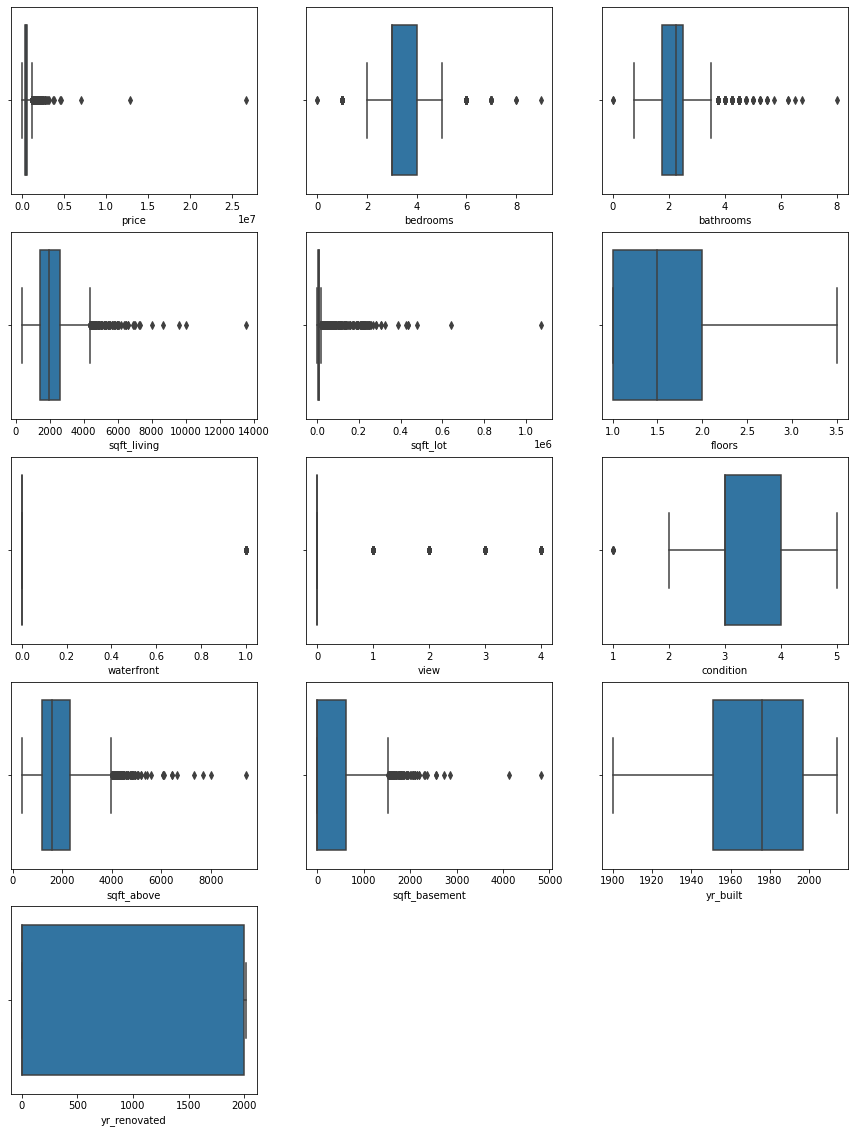%0A)

In \[14\]:

    def outlier_tret(x):
        upper=x.quantile(0.98)
        lower=x.quantile(0.2)
        x=np.where(x>upper,upper,x)
        x=np.where(x<lower,lower,x)
        return x

In \[15\]:

    data1[num_var]=data1[num_var].apply(lambda x: outlier_tret(x))

In \[16\]:

    #now we delete outliers
    i=1
    plt.figure(figsize=(15,20))
    for j in num_var:
        plt.subplot(5,3,i)
        sns.boxplot(data=data1,x=j)
        i+=1

![](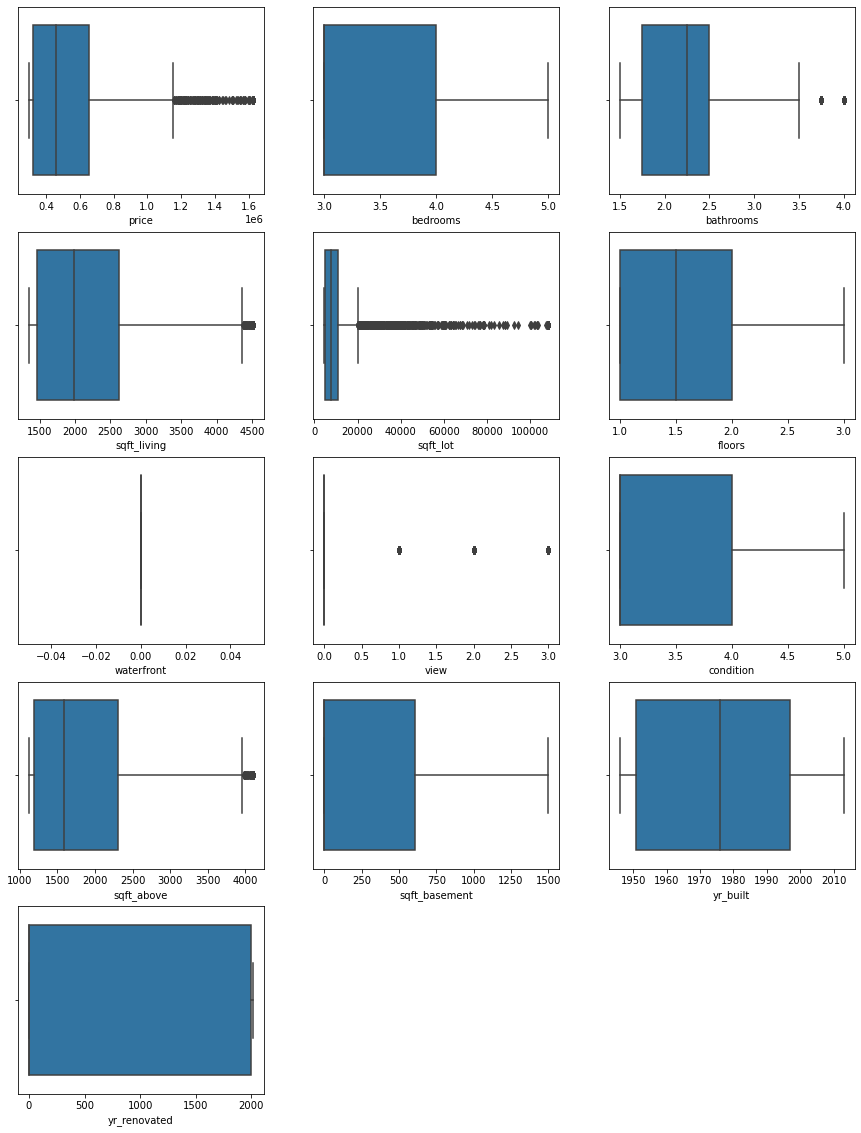%0A)

In \[17\]:

    data1.hist(figsize=(15,20))
    plt.show()

![](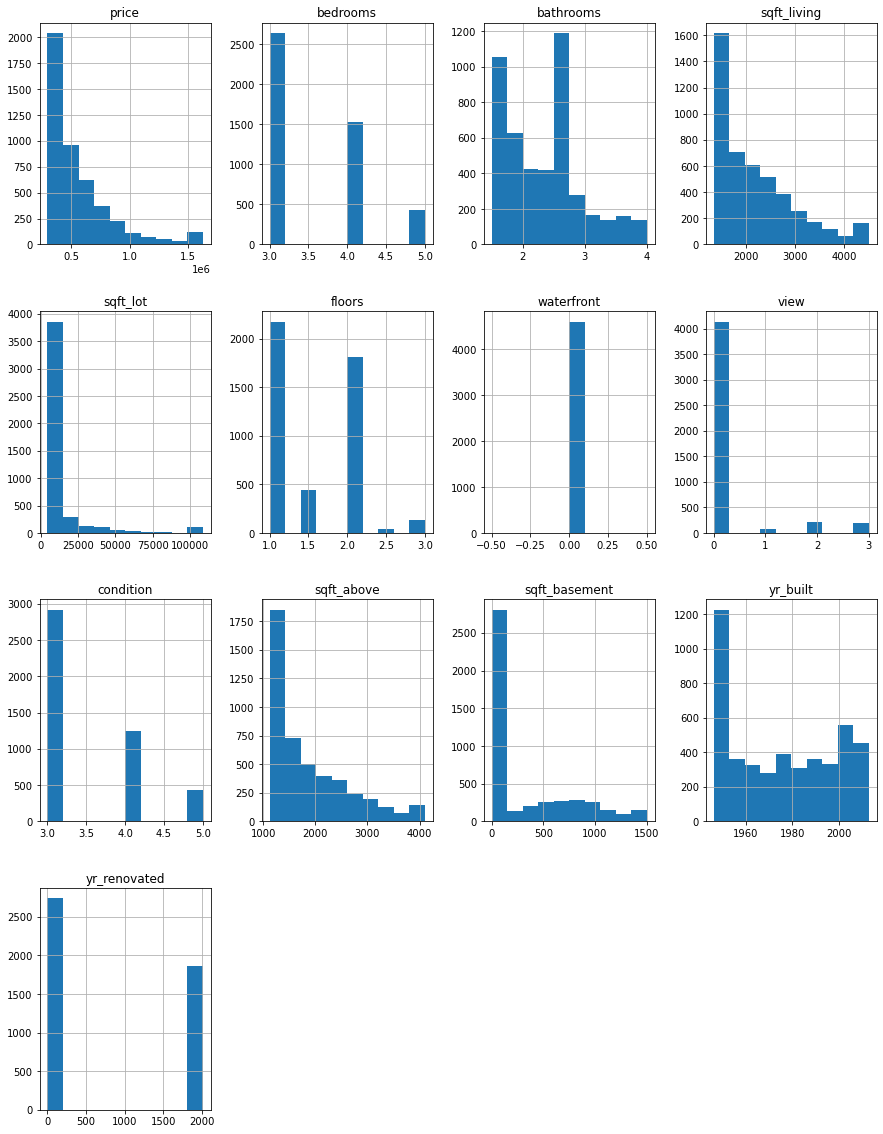%0A)

In \[18\]:

    data1[cat_var].nunique()

Out\[18\]:

    street      4525
    city          44
    statezip      77
    country        1
    dtype: int64

In \[19\]:

    #we remove the street,country,statezip columns because this does'nt impact the pric
    data1.drop(columns=['street','statezip','country'],inplace=True)

In \[20\]:

    data1.head()

Out\[20\]:

|     | price     | bedrooms | bathrooms | sqft\_living | sqft\_lot | floors | waterfront | view | condition | sqft\_above | sqft\_basement | yr\_built | yr\_renovated | city      |
|-----|-----------|----------|-----------|--------------|-----------|--------|------------|------|-----------|-------------|----------------|-----------|---------------|-----------|
| 0   | 313000.0  | 3.0      | 1.50      | 1350.0       | 7912.0    | 1.5    | 0.0        | 0.0  | 3.0       | 1340.0      | 0.0            | 1955.0    | 2005.0        | Shoreline |
| 1   | 1625200.0 | 5.0      | 2.50      | 3650.0       | 9050.0    | 2.0    | 0.0        | 3.0  | 5.0       | 3370.0      | 280.0          | 1946.0    | 0.0           | Seattle   |
| 2   | 342000.0  | 3.0      | 2.00      | 1930.0       | 11947.0   | 1.0    | 0.0        | 0.0  | 4.0       | 1930.0      | 0.0            | 1966.0    | 0.0           | Kent      |
| 3   | 420000.0  | 3.0      | 2.25      | 2000.0       | 8030.0    | 1.0    | 0.0        | 0.0  | 4.0       | 1120.0      | 1000.0         | 1963.0    | 0.0           | Bellevue  |
| 4   | 550000.0  | 4.0      | 2.50      | 1940.0       | 10500.0   | 1.0    | 0.0        | 0.0  | 4.0       | 1140.0      | 800.0          | 1976.0    | 1992.0        | Redmond   |

In \[89\]:

    corr=data1.corr()["price"].sort_values(ascending=False)

In \[90\]:

    corr

Out\[90\]:

    price            1.000000
    sqft_living      0.676081
    sqft_above       0.577786
    bathrooms        0.512974
    view             0.363471
    bedrooms         0.329549
    sqft_basement    0.289345
    floors           0.267259
    sqft_lot         0.131891
    yr_built         0.069010
    condition        0.048595
    yr_renovated    -0.047007
    waterfront            NaN
    Name: price, dtype: float64

In \[26\]:

    plt.figure(figsize=(10,5))
    corr.plot(kind='bar',color='red')

Out\[26\]:

    <AxesSubplot:>

![](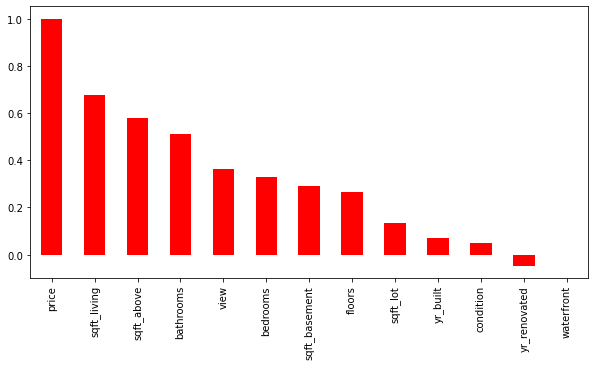%0A)

In \[27\]:

    data1['price'] = data1['price'].astype(int)

In \[28\]:

    #dividing data
    x = data1[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
    y = data1['price']

In \[29\]:

    x.head(10)

Out\[29\]:

|     | bedrooms | bathrooms | sqft\_living | sqft\_lot | floors | view | condition | sqft\_above | sqft\_basement | yr\_built | yr\_renovated |
|-----|----------|-----------|--------------|-----------|--------|------|-----------|-------------|----------------|-----------|---------------|
| 0   | 3.0      | 1.50      | 1350.0       | 7912.0    | 1.5    | 0.0  | 3.0       | 1340.0      | 0.0            | 1955.0    | 2005.0        |
| 1   | 5.0      | 2.50      | 3650.0       | 9050.0    | 2.0    | 3.0  | 5.0       | 3370.0      | 280.0          | 1946.0    | 0.0           |
| 2   | 3.0      | 2.00      | 1930.0       | 11947.0   | 1.0    | 0.0  | 4.0       | 1930.0      | 0.0            | 1966.0    | 0.0           |
| 3   | 3.0      | 2.25      | 2000.0       | 8030.0    | 1.0    | 0.0  | 4.0       | 1120.0      | 1000.0         | 1963.0    | 0.0           |
| 4   | 4.0      | 2.50      | 1940.0       | 10500.0   | 1.0    | 0.0  | 4.0       | 1140.0      | 800.0          | 1976.0    | 1992.0        |
| 5   | 3.0      | 1.50      | 1350.0       | 6380.0    | 1.0    | 0.0  | 3.0       | 1120.0      | 0.0            | 1946.0    | 1994.0        |
| 6   | 3.0      | 2.00      | 1350.0       | 4613.8    | 1.0    | 0.0  | 3.0       | 1350.0      | 0.0            | 1976.0    | 0.0           |
| 7   | 4.0      | 2.50      | 2710.0       | 35868.0   | 2.0    | 0.0  | 3.0       | 2710.0      | 0.0            | 1989.0    | 0.0           |
| 8   | 3.0      | 2.50      | 2430.0       | 88426.0   | 1.0    | 0.0  | 4.0       | 1570.0      | 860.0          | 1985.0    | 0.0           |
| 9   | 4.0      | 2.00      | 1520.0       | 6200.0    | 1.5    | 0.0  | 3.0       | 1520.0      | 0.0            | 1946.0    | 2010.0        |

In \[30\]:

    y.head()

Out\[30\]:

    0     313000
    1    1625199
    2     342000
    3     420000
    4     550000
    Name: price, dtype: int32

In \[31\]:

    # Splitting the dataset into training and test set.  
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  

In \[32\]:

    #feature Scaling  
    from sklearn.preprocessing import StandardScaler    
    st_x= StandardScaler()    
    x_train= st_x.fit_transform(x_train)    
    x_test= st_x.transform(x_test) 

In \[33\]:

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In \[64\]:

    #Fitting Logistic Regression to the training set  
    from sklearn.linear_model import LogisticRegression  
    classifier= LogisticRegression(random_state=0)  
    classifier.fit(x_train, y_train)
    y_pred= classifier.predict(x_test)  
    accuracy_score(y_test,y_pred)

Out\[64\]:

    0.1891304347826087

In \[65\]:

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In \[86\]:

    m0 = 'Logistic'
    # Mean Absolute Error
    m1 = "{:.2f}".format(mean_absolute_error(y_test, y_pred))
    print("\nMean Absolute Error:", mean_absolute_error(y_test, y_pred))
    # RMSE
    m2 = mean_squared_error(y_test, y_pred)**0.5
    print("\nRMSE:", mean_squared_error(y_test, y_pred)**0.5)
    # R2 Squared:
    m3 = r2_score(y_test, y_pred)
    print("\nR2 Squared - Score:", r2_score(y_test, y_pred))
    # Training Score
    m4 = "{:.2f}".format(classifier.score(x_train, y_train))
    print("\nTraining Score:", classifier.score(x_train, y_train))

    Mean Absolute Error: 228237.04347826086

    RMSE: 8812.330019328896

    R2 Squared - Score: 0.9990454569520882

    Training Score: 0.23505434782608695

In \[88\]:

    # Testing score
    m5 = "{:.2f}".format(classifier.score(x_test, y_test))
    print("\nTesting score:",classifier.score(x_test, y_test))

    Testing score: 0.1891304347826087

In \[45\]:

    y_test1=y_test.copy()
    y_test1['predicted_price']=y_pred

In \[47\]:

    y_test1.corr()
    # accuracy is 77%

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    <ipython-input-47-1be2c78cb5c6> in <module>
    ----> 1 y_test1.corr()
          2 # accuracy is 77%

    TypeError: corr() missing 1 required positional argument: 'other'

In \[38\]:

    from sklearn.svm import SVC # "Support vector classifier"  
    classifier = SVC(kernel='linear', random_state=0)  
    classifier.fit(x_train, y_train)
    y_pred= classifier.predict(x_test)
    accuracy_score(y_test,y_pred)

Out\[38\]:

    0.18695652173913044

In \[ \]: